In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import cv2
from extra_functions import cluster_gen

In [2]:
df = pd.read_csv('./data/moonson_timur/1990.csv', delimiter=',', header=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    print('\n\n\n\nJumlah data : ',len(df))

     Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0   -14.466667  115.500000          2       9         5
1   -14.100000  115.166667          1       7         0
2   -11.633333  118.233333          0       6         0
3   -12.133333  117.666667          0       5         0
4   -13.000000  113.616667          0       9         1
5   -12.500000  113.100000          1       6         0
6   -11.450000  113.166667          1       1         0
7   -12.250000  114.283333          0       8         0
8   -11.916667  115.200000          1       4         0
9   -11.166667  114.966667          0       3         0
10  -10.333333  124.666667         18       0         0
11  -10.716667  124.616667          6       1         0
12  -10.816667  123.766667          8       2         0
13  -12.033333  119.233333          2       1         0
14  -12.783333  119.716667         20       1         0
15  -10.100000  122.033333          3       2         0
16  -11.833333  117.566667          1       5   

In [3]:
# Generate some clusters!
# n_clusters = 50
# clusters_x, clusters_y = cluster_gen(n_clusters)

# # Convert to a single dataset in OpenCV format
# data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

data=df

X = StandardScaler().fit_transform(data)

# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=2, min_samples=5).fit(data)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(data))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 14
Total Data :  977
Estimated number of noise points: 590
Silhouette Coefficient: -0.247


Text(0.5, 1.0, 'Original Data')

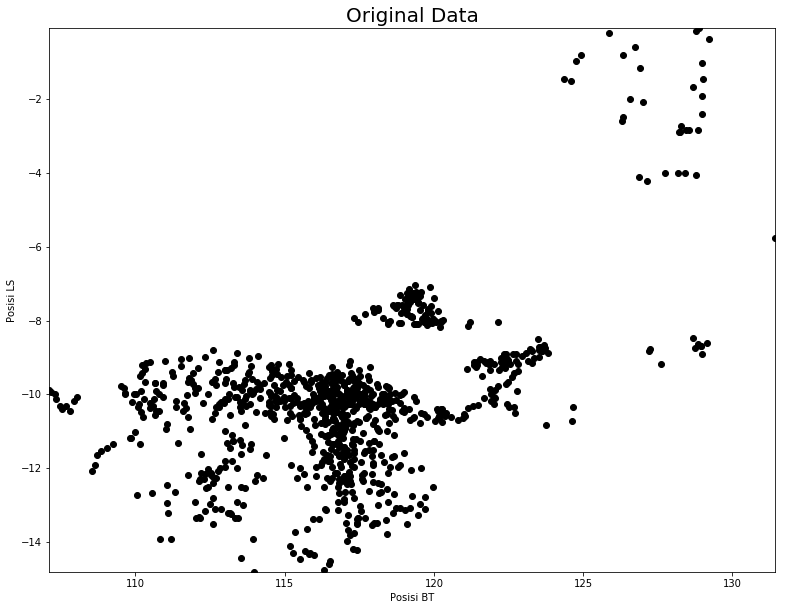

In [5]:
%matplotlib inline
# Plot up the results!
min_x = np.min(data['Posisi_BT'])
max_x = np.max(data['Posisi_BT'])
min_y = np.min(data['Posisi_LS'])
max_y = np.max(data['Posisi_LS'])

fig = plt.figure(figsize=(13,10))
plt.plot(data['Posisi_BT'], data['Posisi_LS'], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('Original Data', fontsize = 20)

<IPython.core.display.Javascript object>


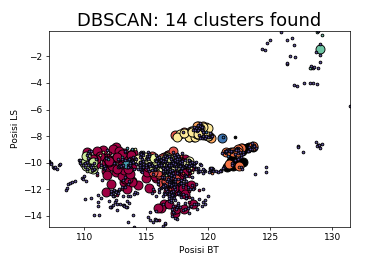


      Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
3   -12.133333  117.666667          0       5         0
6   -11.450000  113.166667          1       1         0
8   -11.916667  115.200000          1       4         0
9   -11.166667  114.966667          0       3         0
16  -11.833333  117.566667          1       5         0
17  -12.216667  117.150000          1       5         0
19  -12.116667  116.766667          1       0         0
29  -11.283333  116.466667          2       1         0
32  -13.083333  118.733333          1       0         1
36  -12.150000  117.916667          1       0         0
37  -11.700000  118.600000          0       1         0
38  -11.933333  117.250000          0       2         0
48  -12.000000  113.416667          1       1         0
50  -12.166667  111.766667          2       3         1
57  -13.133333  116.383333          0       4         0
58  -13.366667  116.166667          0       4         0
63  -13.383333  115.933333          1       5 

In [7]:
%matplotlib notebook
# plt.subplt(122)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)
    print('\n', xy,'\nMember of Cluster : ', len(xy))

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
    
# Plot up the results!
# min_x = np.min(data['Posisi_BT'])
# max_x = np.max(data['Posisi_BT'])
# min_y = np.min(data['Posisi_LS'])
# max_y = np.max(data['Posisi_LS'])
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.show()